In [2]:
import os
import json
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Install OpenPose

import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`

In [0]:
# delete directory
filename = '/content/drive/My Drive/Colab Notebooks/ANN/test_openpose/'

if os.path.exists(filename):
    os.rmdir(filename)

In [0]:
# get body landmarks using open pose
!cd openpose && ./build/examples/openpose/openpose.bin --video /content/drive/My\ Drive/Colab\ Notebooks/ANN/data/wave-ixmas/wave40.avi --write_json /content/drive/My\ Drive/Colab\ Notebooks/ANN/test_openpose/ --display 0 --render_pose 0

In [0]:
path = '/content/drive/My Drive/Colab Notebooks/ANN/test_openpose/'
model = load_model('/content/drive/My Drive/Colab Notebooks/ANN/model1.h5')

def test_prepare_data(file_name, path):
  d = list()
  for file in os.listdir(path):
    if file.startswith(file_name + '_'):
      with open(os.path.join(path, file)) as f_json:
        df = json.load(f_json)
        if (df['people'] != []):
          keypoints = df['people'][0]['pose_keypoints_2d']
          d.append(keypoints)
  return d

def testing(file_name):
  test = np.array(test_prepare_data(file_name, path))
  X_test = np.zeros((1, 81, 75))
  X_test[0, 0:len(test)] = test if len(test) < 81 else test[0:81]
  print("X_test shape = %s"%(str(X_test.shape)))
  y_hat = model.predict(X_test)
  print("prediction = %s"%(str(y_hat)))

  # show the figure
  frames = range(0, X_test.shape[1])
  plt.plot(frames, np.transpose(np.ones(X_test.shape[1]) * y_hat), 'b', label = 'pick up')
  plt.ylabel('Label')
  plt.xlabel('time(frame number)')
  plt.ylim([-0.2 , 1.2])
  plt.legend()

  # create json file
  j_dict = {
      "pick up": [0, float(y_hat)]
  }
  print(j_dict)
  return j_dict


X_test shape = (1, 81, 75)
prediction = [[0.9967309]]
{'pick up': [0, 0.9967309236526489]}


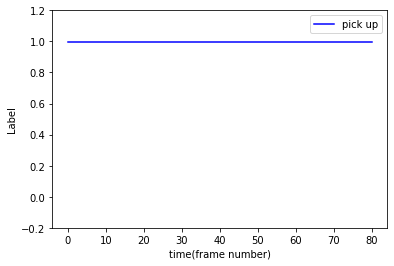

In [85]:
# test1

file_name = 'pick37'
j_dict = testing(file_name)

with open(os.path.join(path, file_name + '.json'), 'w') as fp:
    json.dump(j_dict, fp,  indent=4)

X_test shape = (1, 81, 75)
prediction = [[0.00677574]]
{'pick up': [0, 0.006775740068405867]}


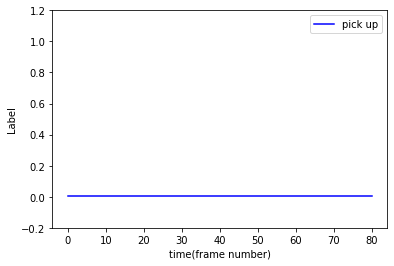

In [86]:
# test2

file_name = 'wave36'
j_dict = testing(file_name)

with open(os.path.join(path, file_name + '.json'), 'w') as fp:
    json.dump(j_dict, fp,  indent=4)

X_test shape = (1, 81, 75)
prediction = [[0.9967816]]
{'pick up': [0, 0.996781587600708]}


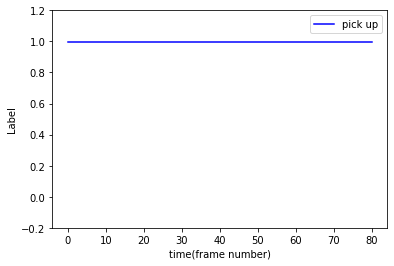

In [87]:
# test3

file_name = 'pick38'
j_dict = testing(file_name)

with open(os.path.join(path, file_name + '.json'), 'w') as fp:
    json.dump(j_dict, fp,  indent=4)

X_test shape = (1, 81, 75)
prediction = [[0.00727741]]
{'pick up': [0, 0.007277413737028837]}


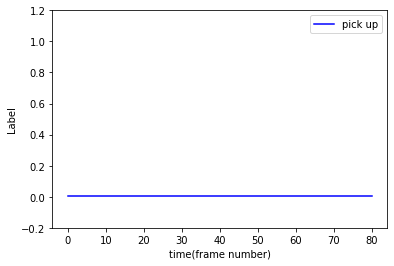

In [88]:
# test4

file_name = 'wave37'
j_dict = testing(file_name)

with open(os.path.join(path, file_name + '.json'), 'w') as fp:
    json.dump(j_dict, fp,  indent=4)

X_test shape = (1, 81, 75)
prediction = [[0.99677306]]
{'pick up': [0, 0.9967730641365051]}


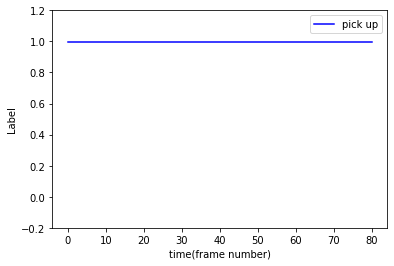

In [89]:
# test5

file_name = 'pick39'
j_dict = testing(file_name)

with open(os.path.join(path, file_name + '.json'), 'w') as fp:
    json.dump(j_dict, fp,  indent=4)